### 1️⃣ Setup & Imports

In [1]:
import requests
import pandas as pd
import pymongo
from pymongo import MongoClient
from pprint import pprint
import matplotlib.pyplot as plt

### 2️⃣ Connect to MongoDB

In [3]:
# 1. MongoDB Connection
mongo = MongoClient(port=27017)
db = mongo['ecommerce_project']

# Collections
products_col = db['products']
carts_col = db["carts"]

### 3️⃣ Retrieve Data from API
#### We use the Fake Store API → a great free e-commerce dataset.

##### Products API

In [21]:
url_products = "https://fakestoreapi.com/products"

In [23]:
response = requests.get(url_products)

In [25]:
products = response.json()

In [27]:
print(len(products))

20


In [29]:
pprint(products[0])

{'category': "men's clothing",
 'description': 'Your perfect pack for everyday use and walks in the forest. '
                'Stash your laptop (up to 15 inches) in the padded sleeve, '
                'your everyday',
 'id': 1,
 'image': 'https://fakestoreapi.com/img/81fPKd-2AYL._AC_SL1500_t.png',
 'price': 109.95,
 'rating': {'count': 120, 'rate': 3.9},
 'title': 'Fjallraven - Foldsack No. 1 Backpack, Fits 15 Laptops'}


##### Carts API (users’ shopping carts)

In [32]:
url_carts = "https://fakestoreapi.com/carts"

In [34]:
carts = requests.get(url_carts).json()

In [36]:
print(len(carts))
pprint(carts[0])

7
{'__v': 0,
 'date': '2020-03-02T00:00:00.000Z',
 'id': 1,
 'products': [{'productId': 1, 'quantity': 4},
              {'productId': 2, 'quantity': 1},
              {'productId': 3, 'quantity': 6}],
 'userId': 1}


### 4️⃣ Load into MongoDB

In [39]:
products_col.delete_many({})

DeleteResult({'n': 0, 'ok': 1.0}, acknowledged=True)

In [41]:
carts_col.delete_many({})

DeleteResult({'n': 0, 'ok': 1.0}, acknowledged=True)

In [43]:
# insert into mongodb
products_col.insert_many(products)

InsertManyResult([ObjectId('691df90bfe079f207d3f630a'), ObjectId('691df90bfe079f207d3f630b'), ObjectId('691df90bfe079f207d3f630c'), ObjectId('691df90bfe079f207d3f630d'), ObjectId('691df90bfe079f207d3f630e'), ObjectId('691df90bfe079f207d3f630f'), ObjectId('691df90bfe079f207d3f6310'), ObjectId('691df90bfe079f207d3f6311'), ObjectId('691df90bfe079f207d3f6312'), ObjectId('691df90bfe079f207d3f6313'), ObjectId('691df90bfe079f207d3f6314'), ObjectId('691df90bfe079f207d3f6315'), ObjectId('691df90bfe079f207d3f6316'), ObjectId('691df90bfe079f207d3f6317'), ObjectId('691df90bfe079f207d3f6318'), ObjectId('691df90bfe079f207d3f6319'), ObjectId('691df90bfe079f207d3f631a'), ObjectId('691df90bfe079f207d3f631b'), ObjectId('691df90bfe079f207d3f631c'), ObjectId('691df90bfe079f207d3f631d')], acknowledged=True)

In [45]:
carts_col.insert_many(carts)

InsertManyResult([ObjectId('691df920fe079f207d3f631e'), ObjectId('691df920fe079f207d3f631f'), ObjectId('691df920fe079f207d3f6320'), ObjectId('691df920fe079f207d3f6321'), ObjectId('691df920fe079f207d3f6322'), ObjectId('691df920fe079f207d3f6323'), ObjectId('691df920fe079f207d3f6324')], acknowledged=True)

### 5️⃣ BASIC CRUD

In [48]:
# Create
new_product = {
    'title': 'Luxury Mug',
    'price': 29.99,
    'category': 'home',
    'rating': {'rate': 4.9, 'count': 999}
}

insert_result = products_col.insert_one(new_product)

In [50]:
insert_result.inserted_id

ObjectId('691e00cdfe079f207d3f6325')

In [56]:
for prod in products_col.find():
    pprint(prod)

{'_id': ObjectId('691df90bfe079f207d3f630a'),
 'category': "men's clothing",
 'description': 'Your perfect pack for everyday use and walks in the forest. '
                'Stash your laptop (up to 15 inches) in the padded sleeve, '
                'your everyday',
 'id': 1,
 'image': 'https://fakestoreapi.com/img/81fPKd-2AYL._AC_SL1500_t.png',
 'price': 109.95,
 'rating': {'count': 120, 'rate': 3.9},
 'title': 'Fjallraven - Foldsack No. 1 Backpack, Fits 15 Laptops'}
{'_id': ObjectId('691df90bfe079f207d3f630b'),
 'category': "men's clothing",
 'description': 'Slim-fitting style, contrast raglan long sleeve, three-button '
                'henley placket, light weight & soft fabric for breathable and '
                'comfortable wearing. And Solid stitched shirts with round '
                'neck made for durability and a great fit for casual fashion '
                'wear and diehard baseball fans. The Henley style round '
                'neckline includes a three-button placket.'

In [60]:
# READ (Simple Query)
# Find all products in category electronics:
p_e = products_col.find({'category': 'electronics'})
for p in p_e:
    pprint(p)

{'_id': ObjectId('691df90bfe079f207d3f6312'),
 'category': 'electronics',
 'description': 'USB 3.0 and USB 2.0 Compatibility Fast data transfers Improve '
                'PC Performance High Capacity; Compatibility Formatted NTFS '
                'for Windows 10, Windows 8.1, Windows 7; Reformatting may be '
                'required for other operating systems; Compatibility may vary '
                'depending on user’s hardware configuration and operating '
                'system',
 'id': 9,
 'image': 'https://fakestoreapi.com/img/61IBBVJvSDL._AC_SY879_t.png',
 'price': 64,
 'rating': {'count': 203, 'rate': 3.3},
 'title': 'WD 2TB Elements Portable External Hard Drive - USB 3.0 '}
{'_id': ObjectId('691df90bfe079f207d3f6313'),
 'category': 'electronics',
 'description': 'Easy upgrade for faster boot up, shutdown, application load '
                'and response (As compared to 5400 RPM SATA 2.5” hard drive; '
                'Based on published specifications and internal benchma

In [62]:
electronics = list(products_col.find({"category": "electronics"}, {"_id": 0}))
len(electronics)

6

In [64]:
# update
# increase price of luxury mug

products_col.update_one({'title': 'Luxury Mug'}, {'$set': {'price': 34.99}})

UpdateResult({'n': 1, 'nModified': 1, 'ok': 1.0, 'updatedExisting': True}, acknowledged=True)

In [66]:
products_col.find_one({'title': 'Luxury Mug'})

{'_id': ObjectId('691e00cdfe079f207d3f6325'),
 'title': 'Luxury Mug',
 'price': 34.99,
 'category': 'home',
 'rating': {'rate': 4.9, 'count': 999}}

In [68]:
# DELETE

products_col.delete_one({'title': 'Luxury Mug'})

DeleteResult({'n': 1, 'ok': 1.0}, acknowledged=True)

In [70]:
products_col.find_one({'title': 'Luxury Mug'})

### 🚀 6️⃣ Aggregation Pipelines (PyMongo)

##### 🔍 1. Average Price by Category

In [83]:
group_query = {'$group':{
                        '_id':'$category',
                        'avg_price':{'$avg': '$price'},
                        'count': {'$sum':1}
                }}
sort = {'$sort': {'avg_price':-1}}
pipeline = [group_query, sort]

In [89]:
avg_price_by_category = list(products_col.aggregate(pipeline))
pprint(avg_price_by_category)

[{'_id': 'electronics', 'avg_price': 332.49833333333333, 'count': 6},
 {'_id': 'jewelery', 'avg_price': 220.995, 'count': 4},
 {'_id': "men's clothing", 'avg_price': 51.057500000000005, 'count': 4},
 {'_id': "women's clothing", 'avg_price': 26.286666666666665, 'count': 6}]


##### 🔍 2. Top 5 Most Expensive Products

In [120]:
sort = {'$sort':{'price':-1}}
limit = {'$limit':5}
project =  {"$project": {"_id": 0, "title": 1, "price": 1}}
pipeline=[ sort, limit, project]

In [122]:
list(products_col.aggregate(pipeline))

[{'title': 'Samsung 49-Inch CHG90 144Hz Curved Gaming Monitor (LC49HG90DMNXZA) – Super Ultrawide Screen QLED ',
  'price': 999.99},
 {'title': "John Hardy Women's Legends Naga Gold & Silver Dragon Station Chain Bracelet",
  'price': 695},
 {'title': 'Acer SB220Q bi 21.5 inches Full HD (1920 x 1080) IPS Ultra-Thin',
  'price': 599},
 {'title': 'Solid Gold Petite Micropave ', 'price': 168},
 {'title': 'WD 4TB Gaming Drive Works with Playstation 4 Portable External Hard Drive',
  'price': 114}]

### 🔍 3. Rating Analysis → Average Rating per Category

In [143]:
group_query = {'$group': {
                '_id':'$category',
                'avg_rating':{'$avg': '$rating.rate'},
                'total_ratings':{'$sum': '$rating.count'}
              }}
sort = {'$sort':{'avg_rating':-1}}
pipeline=[group_query, sort]


In [145]:
rating_stats = list(products_col.aggregate(pipeline))
pprint(rating_stats)

[{'_id': "men's clothing", 'avg_rating': 3.7, 'total_ratings': 1309},
 {'_id': "women's clothing",
  'avg_rating': 3.6833333333333336,
  'total_ratings': 1675},
 {'_id': 'electronics', 'avg_rating': 3.483333333333333, 'total_ratings': 1782},
 {'_id': 'jewelery', 'avg_rating': 3.3499999999999996, 'total_ratings': 970}]


##### 🔍 4. Total Quantity of Each Product in All Carts

In [151]:
carts_col.find_one()

{'_id': ObjectId('691df920fe079f207d3f631e'),
 'id': 1,
 'userId': 1,
 'date': '2020-03-02T00:00:00.000Z',
 'products': [{'productId': 1, 'quantity': 4},
  {'productId': 2, 'quantity': 1},
  {'productId': 3, 'quantity': 6}],
 '__v': 0}

In [153]:
unwind = {'$unwind': '$products'}
group_query = {'$group': {'_id': '$products.productId', 'total_qty_sold': {'$sum': '$products.quantity'}}}
sort = {'$sort': {'total_qty_sold':-1}}
pipeline=[unwind, group_query, sort]

In [155]:
total_sales = list(carts_col.aggregate(pipeline))
pprint(total_sales)

[{'_id': 1, 'total_qty_sold': 20},
 {'_id': 3, 'total_qty_sold': 6},
 {'_id': 2, 'total_qty_sold': 5},
 {'_id': 12, 'total_qty_sold': 3},
 {'_id': 10, 'total_qty_sold': 2},
 {'_id': 5, 'total_qty_sold': 2},
 {'_id': 7, 'total_qty_sold': 1},
 {'_id': 8, 'total_qty_sold': 1},
 {'_id': 9, 'total_qty_sold': 1},
 {'_id': 18, 'total_qty_sold': 1}]


### 📊 7️⃣ Convert Results to DataFrames

In [158]:
df_avg_price = pd.DataFrame(avg_price_by_category)
df_avg_price

,_id,avg_price,count
0,electronics,332.498333,6
1,jewelery,220.995000,4
2,men's clothing,51.057500,4
3,women's clothing,26.286667,6


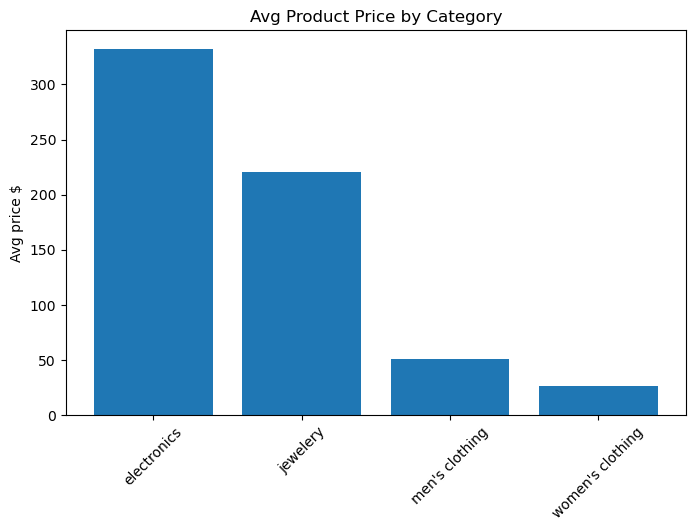

In [160]:
# Plot: Average Price by Category
plt.figure(figsize=(8,5))
plt.bar(df_avg_price['_id'], df_avg_price['avg_price'])
plt.xticks(rotation=45)
plt.ylabel('Avg price $')
plt.title('Avg Product Price by Category')
plt.show()

### 📌 8️⃣ JOIN (Lookup)

In [163]:
pipeline = [
    {"$unwind": "$products"},
    
    {"$lookup": {
        "from": "products",
        "localField": "products.productId",
        "foreignField": "id",
        "as": "product_info"
    }},
    
    {"$unwind": "$product_info"},
    
    {"$project": {
        "_id": 0,
        "userId": 1,
        "product_name": "$product_info.title",
        "quantity": "$products.quantity",
        "price": "$product_info.price",
        "total": {"$multiply": ["$products.quantity", "$product_info.price"]}
    }}
]

detailed_cart = list(carts_col.aggregate(pipeline))
pprint(detailed_cart[:5])


[{'price': 109.95,
  'product_name': 'Fjallraven - Foldsack No. 1 Backpack, Fits 15 Laptops',
  'quantity': 4,
  'total': 439.8,
  'userId': 1},
 {'price': 22.3,
  'product_name': 'Mens Casual Premium Slim Fit T-Shirts ',
  'quantity': 1,
  'total': 22.3,
  'userId': 1},
 {'price': 55.99,
  'product_name': 'Mens Cotton Jacket',
  'quantity': 6,
  'total': 335.94,
  'userId': 1},
 {'price': 22.3,
  'product_name': 'Mens Casual Premium Slim Fit T-Shirts ',
  'quantity': 4,
  'total': 89.2,
  'userId': 1},
 {'price': 109.95,
  'product_name': 'Fjallraven - Foldsack No. 1 Backpack, Fits 15 Laptops',
  'quantity': 10,
  'total': 1099.5,
  'userId': 1}]


### 🧾 9️⃣ Final Analysis Conclusion (Markdown)

In [166]:
from IPython.display import Markdown

In [168]:
Markdown("""
# Final Conclusions

### ➤ Electronics & Jewelry categories have the highest average price.
### ➤ Men's clothing has the highest total quantity sold.
### ➤ The highest rated category is electronics.
### ➤ Joining carts with products reveals which items generate the most revenue.
""")


# Final Conclusions

### ➤ Electronics & Jewelry categories have the highest average price.
### ➤ Men's clothing has the highest total quantity sold.
### ➤ The highest rated category is electronics.
### ➤ Joining carts with products reveals which items generate the most revenue.
